In [1]:
import os, glob
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as Image
from IPython import display

In [2]:
files = glob.glob('imgs/mit_test10/*.png')
files

['imgs/mit_test10/000007.png',
 'imgs/mit_test10/000002.png',
 'imgs/mit_test10/000008.png',
 'imgs/mit_test10/000004.png',
 'imgs/mit_test10/000010.png',
 'imgs/mit_test10/000001.png',
 'imgs/mit_test10/000009.png',
 'imgs/mit_test10/000003.png',
 'imgs/mit_test10/000006.png',
 'imgs/mit_test10/000005.png']

In [3]:

def get_index(shape, cfa_pattern=4):
    if not (isinstance(shape, np.ndarray) or 
            isinstance(shape, tuple) or 
            isinstance(shape, list)) :
#         ValueError('not ndarray/tuple/list')
        print('not ndarray/tuple/list')
#         exit() 
        return 
    ## GRBG order
    height, width = shape[:2]
    assert (height % (cfa_pattern*2)) == 0
    assert (width  % (cfa_pattern*2)) == 0
    
    repr_h = height// (cfa_pattern*2)
    repr_w = width // (cfa_pattern*2)
    
    ones  = np.ones( (cfa_pattern, cfa_pattern))
    zeros = np.zeros((cfa_pattern, cfa_pattern))
    
#     GR
#     BG order
    
    # get cell size index
    idx_g1 = np.concatenate( ( np.concatenate((ones,  zeros), axis=1), 
                               np.concatenate((zeros, zeros), axis=1) ), axis=0)
        
    idx_r  = np.concatenate( ( np.concatenate((zeros,  ones), axis=1), 
                               np.concatenate((zeros, zeros), axis=1) ), axis=0)
    
    idx_b  = np.concatenate( ( np.concatenate((zeros, zeros), axis=1),
                               np.concatenate((ones,  zeros), axis=1)), axis=0)
    
    idx_g2 = np.concatenate( ( np.concatenate((zeros, zeros), axis=1),
                               np.concatenate((zeros,  ones), axis=1)), axis=0)
    
    
    # get global index
    idx_G1 = np.tile(idx_g1, (repr_h, repr_w))
    idx_R  = np.tile(idx_r,  (repr_h, repr_w))
    idx_B  = np.tile(idx_b,  (repr_h, repr_w))
    idx_G2 = np.tile(idx_g2, (repr_h, repr_w))
    idx_G = idx_G1 + idx_G2
    idx = {'G1':idx_G1, 'G2':idx_G2, 'G':idx_G, 'R':idx_R, 'B':idx_B}
    return idx



In [ ]:

    
def apply_self_attention(raw, cfa_pattern=4):    
    
    
    print('raw.shape, ', raw.shape)    
    raw = np.concatenate((raw[2*cfa_pattern-1:cfa_pattern-1:-1, :], 
                          raw, 
                          raw[-cfa_pattern-1:-2*cfa_pattern-1:-1, :] ), axis=0)
    print('raw.shape, ', raw.shape)
    raw = np.concatenate((raw[:, 2*cfa_pattern-1:cfa_pattern-1:-1], 
                          raw, 
                          raw[:, -cfa_pattern-1:-2*cfa_pattern-1:-1] ), axis=1)
    
    print('raw.shape, ', raw.shape)
    
    
    return None
    
#     idx_R = idx['R']
#     idx_G = idx['G']
#     idx_B = idx['B']
    

In [ ]:
# files = glob.glob('imgs/mit_test10/*.png')
# files

def patternize(arr, cfa_pattern=4):
    height, width = arr.shape[:2]
    
    idx = get_index(arr.shape, cfa_pattern)
    
    assert isinstance(idx, dict)
    
    idx_R = idx['R']
    idx_G = idx['G']
    idx_B = idx['B']
    
    red_patternized    = arr[...,0] * idx_R
    green_patternized  = arr[...,1] * idx_G
    blue_patternized   = arr[...,2] * idx_B
    
    raw = red_patternized + green_patternized + blue_patternized
    viz = np.concatenate((red_patternized  [..., np.newaxis],
                          green_patternized[..., np.newaxis],
                          blue_patternized [..., np.newaxis]), axis=-1)
    
    
    
    green_attention = apply_self_attention(raw, cfa_pattern)
    
    return raw, viz
    


<Figure size 640x480 with 0 Axes>

raw.shape,  (128, 128)
raw.shape,  (136, 128)
raw.shape,  (136, 136)


<Figure size 640x480 with 0 Axes>

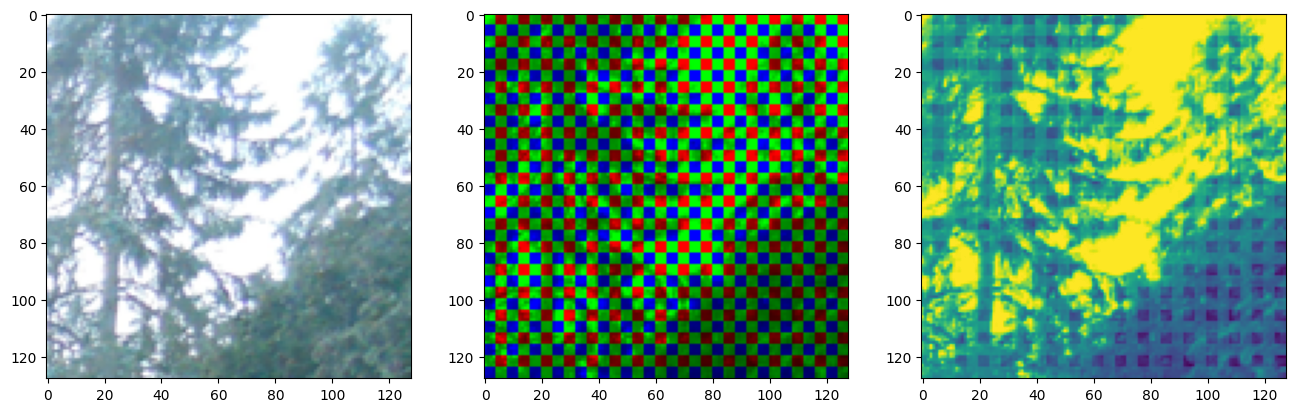

44 255 (128, 128, 3)
0.0 255.0 (128, 128, 3)
50.0 255.0 (128, 128)


KeyboardInterrupt: 

In [33]:

for f in files:
    display.clear_output(wait=True)
    display.display(plt.gcf())  
    plt.figure(figsize=(16,16))
    
    image = Image.open(f)
    arr = np.asarray(image)
    
    raw, viz = patternize(arr)
    

    
    plt.subplot(1,3,1)
    plt.imshow(arr)
    
    plt.subplot(1,3,2)
    plt.imshow(viz.astype(np.uint8))
    
    plt.subplot(1,3,3)
#     plt.imshow(raw.astype(np.uint8), cmap='jet')
    plt.imshow(raw.astype(np.uint8))
    
    plt.show()
    
    print(np.amin(arr), np.amax(arr), arr.shape)
    print(np.amin(viz), np.amax(viz), viz.shape)
    print(np.amin(raw), np.amax(raw), raw.shape)
     
    input()
#     break

In [16]:
a = np.zeros((1))

In [17]:
a

array([0.])

In [18]:
isinstance(a, np.array)

TypeError: isinstance() arg 2 must be a type or tuple of types

In [26]:
isinstance(a, np.ndarray)

True

In [27]:
isinstance([], list)

True

In [24]:
type(type(a))

type

In [25]:
type(type(type(a)))

type

In [12]:
a = np.arange(10*10).reshape(10,10)
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [24]:
a_pad_h = np.concatenate((a[8-1:4-1:-1, :], a, a[-4-1:-8-1:-1] ), axis=0)
print(a_pad_h, a_pad_h.shape)

[[70 71 72 73 74 75 76 77 78 79]
 [60 61 62 63 64 65 66 67 68 69]
 [50 51 52 53 54 55 56 57 58 59]
 [40 41 42 43 44 45 46 47 48 49]
 [ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]
 [50 51 52 53 54 55 56 57 58 59]
 [40 41 42 43 44 45 46 47 48 49]
 [30 31 32 33 34 35 36 37 38 39]
 [20 21 22 23 24 25 26 27 28 29]] (18, 10)


In [25]:
a_pad_w = np.concatenate((a_pad_h[:, 8-1:4-1:-1], a_pad_h, a_pad_h[:, -4-1:-8-1:-1] ), axis=1)
print(a_pad_w, a_pad_w.shape)

[[77 76 75 74 70 71 72 73 74 75 76 77 78 79 75 74 73 72]
 [67 66 65 64 60 61 62 63 64 65 66 67 68 69 65 64 63 62]
 [57 56 55 54 50 51 52 53 54 55 56 57 58 59 55 54 53 52]
 [47 46 45 44 40 41 42 43 44 45 46 47 48 49 45 44 43 42]
 [ 7  6  5  4  0  1  2  3  4  5  6  7  8  9  5  4  3  2]
 [17 16 15 14 10 11 12 13 14 15 16 17 18 19 15 14 13 12]
 [27 26 25 24 20 21 22 23 24 25 26 27 28 29 25 24 23 22]
 [37 36 35 34 30 31 32 33 34 35 36 37 38 39 35 34 33 32]
 [47 46 45 44 40 41 42 43 44 45 46 47 48 49 45 44 43 42]
 [57 56 55 54 50 51 52 53 54 55 56 57 58 59 55 54 53 52]
 [67 66 65 64 60 61 62 63 64 65 66 67 68 69 65 64 63 62]
 [77 76 75 74 70 71 72 73 74 75 76 77 78 79 75 74 73 72]
 [87 86 85 84 80 81 82 83 84 85 86 87 88 89 85 84 83 82]
 [97 96 95 94 90 91 92 93 94 95 96 97 98 99 95 94 93 92]
 [57 56 55 54 50 51 52 53 54 55 56 57 58 59 55 54 53 52]
 [47 46 45 44 40 41 42 43 44 45 46 47 48 49 45 44 43 42]
 [37 36 35 34 30 31 32 33 34 35 36 37 38 39 35 34 33 32]
 [27 26 25 24 20 21 22 23 24 25